# Linear Regression
*Y= wx+b*

Y--> Dependent variable

w--> Weights

x--> Independent Variable

b--> Bias

# Gradient Descent

w = w - a*dw

b = b - a*dw



In [1]:
import numpy as np

Linear Regression

In [19]:
class Linear_Regression:
  def __init__(self, learning_rate, iteration_num):
     self.learning_rate= learning_rate
     self.iteration_num = iteration_num

  def fit(self,X, Y):

    #number of training examples n number of features

    self.m, self.n = X.shape #rows n columns
    self.w= np.zeros(self.n)
    self.b= 0
    self.X= X
    self.Y= Y

    #implementing gradient descent

    for i in range(self.iteration_num):
      self.update_weights()

  def update_weights(self):

    Y_prediction= self.predict(self.X)

    #calculate gradient

    dw= -(2* (self.X.T).dot(self.Y-Y_prediction))/ self.m

    db = -2*np.sum(self.Y- Y_prediction)/self.m

    #updating wieghts

    self.w= self.w- self.learning_rate*dw
    self.b= self.b- self.learning_rate*db

  def predict(self,X):
    return X.dot(self.w)+ self.b



Using the model for prediction

In [6]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [7]:
data = pd.read_csv('/content/salary_data.csv')

In [8]:
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [9]:
data.isnull().any()

YearsExperience    False
Salary             False
dtype: bool

In [10]:
#Splitting the feature and target
X= data.drop('Salary', axis =1)
y= data['Salary']

In [11]:
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [12]:
y.head()

0    39343
1    46205
2    37731
3    43525
4    39891
Name: Salary, dtype: int64

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=2, test_size=0.3)

In [40]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21, 1), (9, 1), (21,), (9,))

In [71]:
#Training the linear regression model
lr = Linear_Regression(learning_rate = 0.02, iteration_num= 1000)

In [72]:
lr.fit(X_train, y_train)

In [73]:
print("weight: ", lr.w[0])
print("bias: ", lr.b)

weight:  9534.934692142133
bias:  23735.972514255136


In [74]:
prediction = lr.predict(X_test)

In [75]:
print(prediction)

1      36131.387614
0      34224.400676
14     66643.178629
9      59015.230875
21     91434.008828
19     80945.580667
23    101922.436990
6      52340.776591
3      42805.841899
dtype: float64


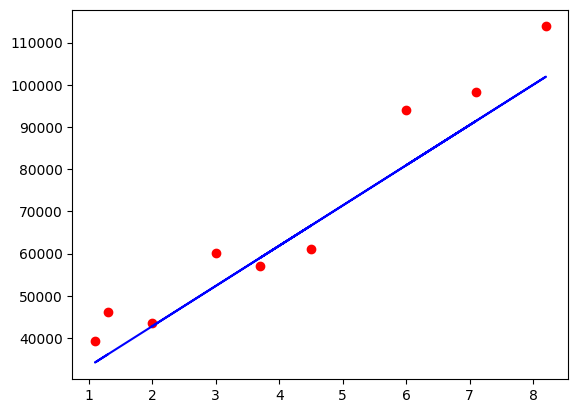

In [76]:
plt.scatter(X_test, y_test, color= 'red')
plt.plot(X_test, prediction, color= 'blue')